# Preparation
* We begin by importing the data from the CSV file

In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("iris.data", header=None)
df.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class label']
raw_data = df[df.columns[:-1]].values

In [31]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Step 1: Compute Mean Vectors
* For each class, we must construct a vector of the means of all of its features.

In [33]:
setosas = df.loc[df['class label'] == 'Iris-setosa']
versicolors = df.loc[df['class label'] == 'Iris-versicolor']
virginicas = df.loc[df['class label'] == 'Iris-virginica']

In [34]:
overall_mean = np.mean(df)
mean_setosas = np.mean(setosas)
mean_versicolors = np.mean(versicolors)
mean_virginicas = np.mean(virginicas)

# Step 2: Compute Scatter-Within matrices for each class
* For each class, we must construct scatter-within matrices

In [40]:
# We must compute Sc for each class
Sc_setosas = np.zeros((4,4))
setosas_col_means = mean_setosas.values.reshape(4,1)
for row in setosas[setosas.columns[:-1]].values:
    row = row.reshape(4,1)
    Sc_setosas += (row - setosas_col_means).dot((row - setosas_col_means).T)

Sc_versicolors = np.zeros((4,4))
versicolors_col_means = mean_versicolors.values.reshape(4,1)
for row in versicolors[versicolors.columns[:-1]].values:
    row = row.reshape(4,1)
    Sc_versicolors += (row - versicolors_col_means).dot((row - versicolors_col_means).T)

Sc_virginicas = np.zeros((4,4))
virginicas_col_means = mean_virginicas.values.reshape(4,1)
for row in virginicas[virginicas.columns[:-1]].values:
    row = row.reshape(4,1)
    Sc_virginicas += (row - virginicas_col_means).dot((row - virginicas_col_means).T)

Sw = sum([Sc_setosas, Sc_versicolors, Sc_virginicas])

n = len(setosas)
mean_setosas_col = mean_setosas.values.reshape(4,1)
mean_versicolors_col = mean_versicolors.values.reshape(4,1)
mean_virginicas_col = mean_virginicas.values.reshape(4,1)
overall_mean_col = overall_mean.values.reshape(4,1)

Sb_setosas = n * (mean_setosas_col - overall_mean_col).dot((mean_setosas_col - overall_mean_col).T)
Sb_versicolors = n * (mean_versicolors_col - overall_mean_col).dot((mean_versicolors_col - overall_mean_col).T)
Sb_virginicas = n * (mean_virginicas_col - overall_mean_col).dot((mean_virginicas_col - overall_mean_col).T)

Sb = sum([Sb_setosas, Sb_versicolors, Sb_virginicas])
print("Sb:")
print(Sb)
print("Sw:")
print(Sw)

Sb:
[[ 63.21213333 -19.534      165.16466667  71.36306667]
 [-19.534       10.9776     -56.0552     -22.4924    ]
 [165.16466667 -56.0552     436.64373333 186.90813333]
 [ 71.36306667 -22.4924     186.90813333  80.60413333]]
Sw:
[[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


# Step 3: Compute Eigenvectors and Eigenvalues from Sb and Sw

In [44]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
eig_pairs = zip(eig_vals, eig_vecs)

# Step 4: Use eigenvectors with highest eigenvalues as axes on a space on which to project the data

In [45]:
eig_pairs_sorted = sorted(eig_pairs, key=lambda tup: tup[0])

ld1 = eig_pairs_sorted[0][1].reshape(4, 1)
ld2 = eig_pairs_sorted[1][1].reshape(4, 1)
W = np.hstack((ld1, ld2))
print(W)

[[ 0.54648218  0.71378517]
 [ 0.25428655 -0.76703217]
 [ 0.39674717 -0.07966285]
 [-0.30274198  0.88294366]]


# Step 5: project the dataset onto the plane defined by the eigenvectors

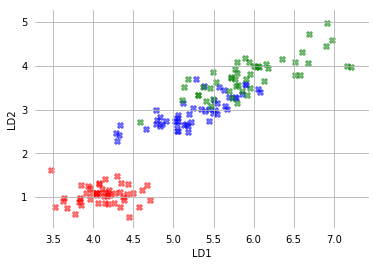

In [97]:
projected = raw_data.dot(W)
projected_setosas = projected[:50]
projected_versicolors = projected[50:100]
projected_virginicas = projected[100:150]

ax = plt.subplot(111)
for point in projected_setosas:
    plt.scatter(x=point[0],
                y=point[1],
                marker='X',
                color='red',
                alpha=0.5,
                label="Setosas"
                )
for point in projected_versicolors:
    plt.scatter(x=point[0],
                y=point[1],
                marker='X',
                color='blue',
                alpha=0.5,
                label="Versicolors"
                )
for point in projected_virginicas:
    plt.scatter(x=point[0],
                y=point[1],
                marker='X',
                color='green',
                alpha=0.5,
                label="Virginicas"
                )
    
plt.xlabel('LD1')
plt.ylabel('LD2')

# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
labelbottom="on", left="off", right="off", labelleft="on")

# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.grid()
plt.tight_layout
plt.show()